<a href="https://colab.research.google.com/github/ufukhurriyetoglu/vector-normalization-for-vector-search/blob/main/understanding_effect_of_l2_normalization_on_vector_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding effect of l2_normalization on Vector Search

In [81]:
import pandas as pd
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA

# What is Vector Search ?

## Definition of a Vector

A vector is a list of items, a list of 3 apples, 4 oranges, and 2 strawberries for example.

fruit_vector -> [apple, apple, apple, orange, orange, orange, orange, strawberry, strawberry]





In [2]:
fruit_vector = ["apple", "apple", "apple", "orange", "orange", "orange", "orange", "strawberry", "strawberry"]

Let's transform this vector to count vector of items where each column holds
count of each fruit:

In [3]:
fruit_df = pd.DataFrame([[3, 4, 2]], columns = ["apple", "orange", "strawberry"])

Here the first of the table is the count vector:

In [4]:
fruit_df.iloc[0].to_numpy()

array([3, 4, 2])

# Visualizing Vectors

In [17]:
def two_d_vector_space(reduced_dims):
    colors = ("red", "green", "blue", "orange")
    groups = ("P", "Q", "U", "V")

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # We need to create spines in order to have a centered axis
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Hide part of the border by setting colour to none
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Do not show ticks on both sides of the axis
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Set a limit so there is some room for the points
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

    # Go through each set of points and plot them on a scatter plot
    for data, color, group in zip(reduced_dims, colors, groups):
        x, y = data
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

    plt.title('2D vector space')
    plt.legend(loc=2)
    plt.show()

def vector_space(a, b, c):
    p = np.array(a)
    q = np.array(b)
    v = np.array(c)
    points = np.vstack((p, q, v))
    two_d_vector_space(points)


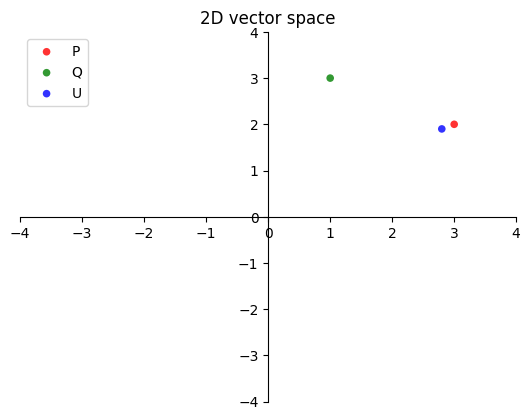

In [18]:
vector_space([3, 2], [1,3], [2.8, 1.9])

## Visualizing three vectors with same unit vector but in different scales (magnitudes)

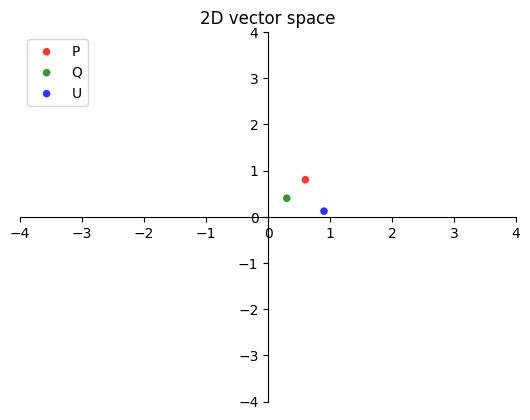

In [20]:
vector_space([0.6, 0.8], [0.3, 0.4], [0.9, 0.12])

# Basics of Vectors

In [23]:
import numpy as np

vector = np.array([0, 1, 2, 3, 4])
magnitude = np.linalg.norm(vector)

print("Magnitude of the vector:", magnitude)

Magnitude of the vector: 5.477225575051661


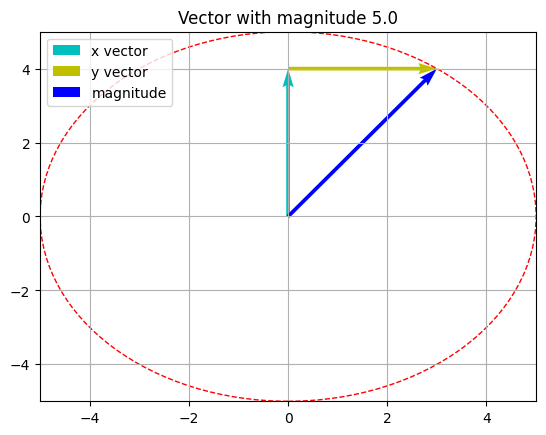

In [48]:
import numpy as np
import matplotlib.pyplot as plt

vector = np.array([3, 4])  # 2D vector

magnitude = np.linalg.norm(vector)

plt.quiver(0, 0,0, 4, angles='xy', scale_units='xy', scale=1, color='c', label='x vector')
plt.quiver(0, 4,3, 0, angles='xy', scale_units='xy', scale=1, color='y', label='y vector')

plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='b', label='magnitude')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title(f"Vector with magnitude {magnitude}")

# Add a circle to represent the magnitude
circle = plt.Circle((0, 0), magnitude, fill=False, color='r', linestyle='dashed')
plt.gca().add_patch(circle)

# Add legend
plt.legend(loc="upper left")

# Add grid
plt.grid(True)

plt.show()

Introduction to Unit Vectors
In mathematics and physics, unit vectors play a crucial role in representing and understanding directions and magnitudes. A unit vector is a vector with a length or magnitude of 1. They are often used to describe the direction of other vectors and simplify calculations involving vector quantities.

In this tutorial, we will explore the concept of unit vectors, discuss their properties, and provide examples of how to calculate and visualize unit vectors using the numpy and matplotlib libraries in Python.

Properties of Unit Vectors
Magnitude: A unit vector has a magnitude of 1. This means that its length or Euclidean norm is equal to 1.

Direction: Unit vectors represent the direction of other vectors. They have no specific units associated with them, as their purpose is to convey direction rather than magnitude.

Normalization: To convert a vector into a unit vector, we perform a process called normalization. This involves dividing each component of the vector by its magnitude.

Notation: Unit vectors are typically denoted by adding a caret symbol (^) above the vector symbol. For example, a unit vector in the x-direction is often represented as i^, a unit vector in the y-direction as j^, and a unit vector in the z-direction as k^.

Calculating Unit Vectors with Numpy
To calculate unit vectors using the numpy library in Python, we can utilize the normalization process. Numpy provides a convenient function to compute the Euclidean norm of a vector, which we can use to normalize the vector components.

Here is an example code snippet that demonstrates how to calculate unit vectors using numpy:

In [49]:
import numpy as np

vector = np.array([3, 4])  # Example vector

# Calculate the magnitude of the vector
magnitude = np.linalg.norm(vector)

# Calculate the unit vector
unit_vector = vector / magnitude

# Print the result
print("Unit Vector:", unit_vector)

Unit Vector: [0.6 0.8]



In the code above, we start by defining a vector [3, 4] using numpy's array function. We then calculate the magnitude of the vector using np.linalg.norm. Next, we divide each component of the vector by its magnitude to obtain the unit vector. The resulting unit vector is printed as [0.6, 0.8].

Visualizing Unit Vectors with Matplotlib
To visualize unit vectors, we can use the matplotlib library in Python. Matplotlib provides a variety of plotting functions that allow us to create vector representations.

Here's an example code snippet that demonstrates how to visualize unit vectors using matplotlib:

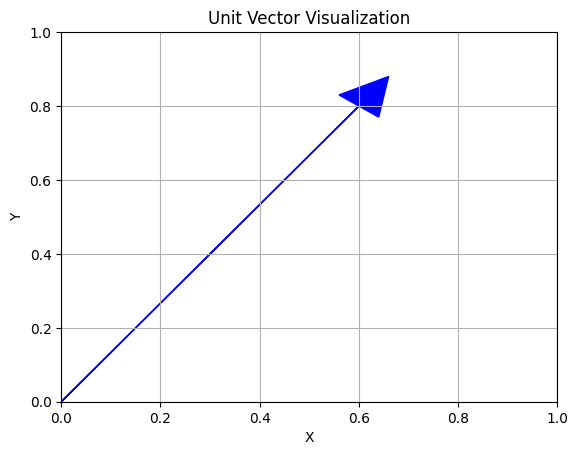

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the unit vector
unit_vector = np.array([0.6, 0.8])

# Create a plot
fig, ax = plt.subplots()

# Plot the unit vector as an arrow
ax.arrow(0, 0, unit_vector[0], unit_vector[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')

# Set the limits of the plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Unit Vector Visualization")

# Show the plot
plt.grid(True)
plt.show()

The code above will display a plot with an arrow representing the unit vector [0.6, 0.8]. The arrow starts at the origin (0, 0) and extends to the point (0.6, 0.8). The head of the arrow is highlighted with a blue color. The x-axis represents the x dimension, and the y-axis represents the y dimension. The plot has gridlines for better visualization.

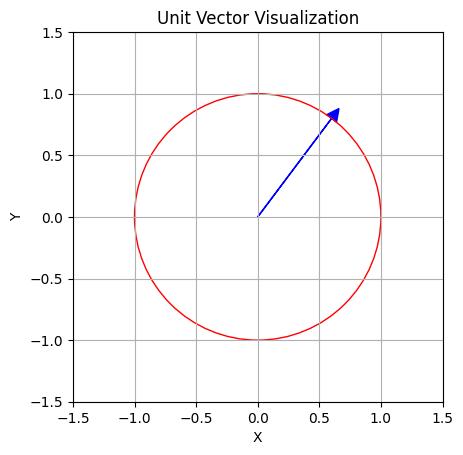

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define the unit vector
unit_vector = np.array([0.6, 0.8])

# Create a plot
fig, ax = plt.subplots()

# Plot the unit vector as an arrow
ax.arrow(0, 0, unit_vector[0], unit_vector[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')

# Plot the unit circle
circle = plt.Circle((0, 0), 1, color='red', fill=False)
ax.add_patch(circle)

# Set the limits of the plot
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Unit Vector Visualization")

# Add gridlines
ax.grid(True)

# Equal aspect ratio for the plot
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

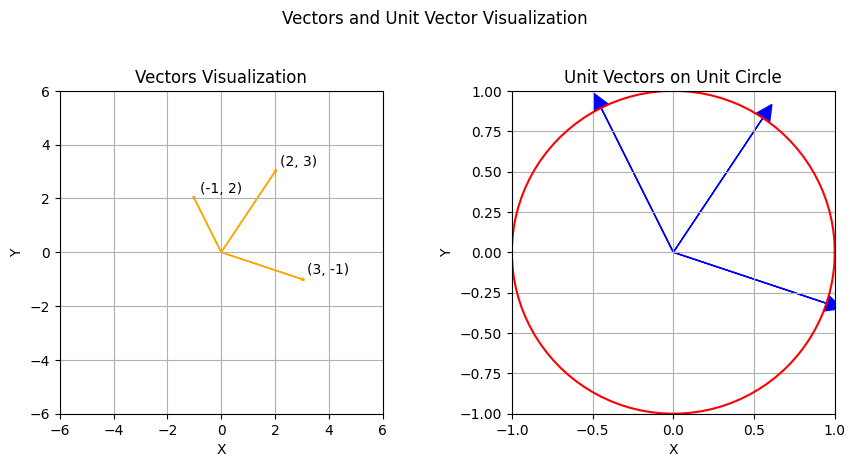

In [54]:

import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(vectors, magnitudes, title):
    # Create a plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the vectors in the first subplot
    for vector, magnitude in zip(vectors, magnitudes):
        ax1.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='orange', ec='orange')
        ax1.text(vector[0] + 0.2, vector[1] + 0.2, f"({vector[0]}, {vector[1]})", color='black')

    ax1.set_xlim(-6, 6)
    ax1.set_ylim(-6, 6)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title("Vectors Visualization")
    ax1.grid(True)
    ax1.set_aspect('equal', adjustable='box')

    # Plot the unit vectors on the unit circle in the second subplot
    unit_vectors = vectors / magnitudes[:, np.newaxis]
    theta = np.linspace(0, 2*np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    ax2.plot(x, y, color='red')
    for vector in unit_vectors:
        ax2.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')

    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title("Unit Vectors on Unit Circle")
    ax2.grid(True)
    ax2.set_aspect('equal', adjustable='box')

    # Add a title to the entire figure
    fig.suptitle(title)

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.4)

    # Show the plot
    plt.show()

# Define the vectors
vectors = np.array([[2, 3], [-1, 2], [3, -1]])
magnitudes = np.linalg.norm(vectors, axis=1)

# Plot the vectors with their magnitudes and the unit vector visualization
plot_vectors(vectors, magnitudes, "Vectors and Unit Vector Visualization")

# Vector Similarity

After transforming the available data we will be able to check similarity of different data points
by leveraging the vector similarity approaches. This will enable us to develop recommender systems,
search systems, or help us better understand data features to train better ML models in terms of generalizations
abnd robustness.

# Introduction to L2 Normalization
L2 normalization, also known as Euclidean normalization or vector normalization, is a technique used to scale vectors to have a unit norm (magnitude). It is a common preprocessing step in machine learning and data analysis tasks, especially when working with algorithms that assume or benefit from normalized input.

L2 normalization involves dividing each vector by its Euclidean norm, which is the square root of the sum of the squared elements. The resulting normalized vectors have a magnitude of 1, making them easier to compare and work with.

## Why L2 Normalization for Vector Search?
Vector search is a common task in various applications, such as information retrieval, recommendation systems, and image processing. In vector search, we need to find vectors that are similar to a given query vector. Similarity measures, like cosine similarity or dot product, are often used to compare vectors.

L2 normalization plays a crucial role in vector search by ensuring that all vectors have a consistent scale. This is important because similarity measures can be affected by the magnitude of the vectors. By normalizing vectors, we remove the influence of their magnitude and focus solely on their direction, making the comparison more meaningful.

## Visualizing L2 Normalization
Let's now visualize the concept of L2 normalization using numpy and matplotlib. We'll start by generating some sample vectors and then normalize them using L2 normalization. Finally, we'll plot the vectors before and after normalization to observe the differences.

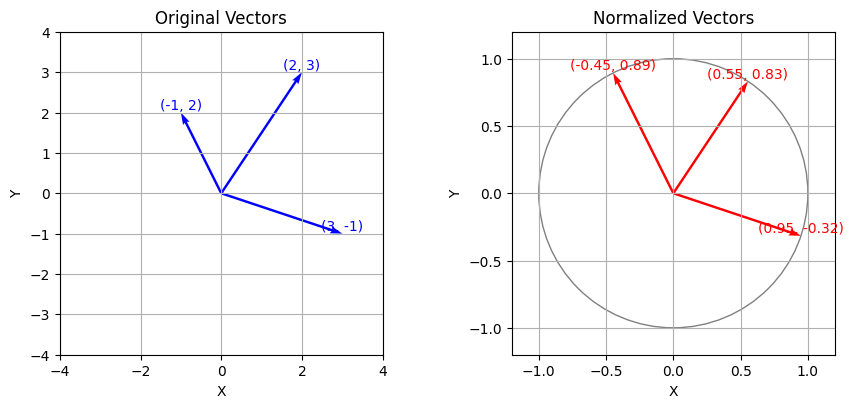

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample vectors
vectors = np.array([[2, 3], [-1, 2], [3, -1]])

# Calculate the Euclidean norms of the vectors
norms = np.linalg.norm(vectors, axis=1)

# Normalize the vectors using L2 normalization
normalized_vectors = vectors / np.expand_dims(norms, axis=1)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original vectors with tags
axs[0].quiver(np.zeros(len(vectors)), np.zeros(len(vectors)), vectors[:, 0], vectors[:, 1], angles='xy', scale_units='xy', scale=1, color='blue')
for i, vector in enumerate(vectors):
    axs[0].text(vector[0], vector[1], f'({vector[0]}, {vector[1]})', ha='center', va='bottom', color='blue')
axs[0].set_xlim([-4, 4])
axs[0].set_ylim([-4, 4])
axs[0].set_aspect('equal')
axs[0].set_title('Original Vectors')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].grid(True)


# Plot the normalized vectors with tags
axs[1].quiver(np.zeros(len(normalized_vectors)), np.zeros(len(normalized_vectors)), normalized_vectors[:, 0], normalized_vectors[:, 1], angles='xy', scale_units='xy', scale=1, color='red')
for i, vector in enumerate(normalized_vectors):
    axs[1].text(vector[0], vector[1], f'({vector[0]:.2f}, {vector[1]:.2f})', ha='center', va='bottom', color='red')
axs[1].set_xlim([-1.2, 1.2])
axs[1].set_ylim([-1.2, 1.2])
axs[1].set_aspect('equal')
axs[1].set_title('Normalized Vectors')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].grid(True)

# Add the unit circle to the second subplot
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
axs[1].add_artist(circle)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.show()


The code above will generate two plots. The first plot shows the original vectors as blue arrows, while the second plot shows the normalized vectors as red arrows. Both plots have the x-axis representing the x dimension and the y-axis representing the y dimension. The aspect ratio is set to maintain the correct shape, and gridlines are included for better visualization.

In the first plot, you'll notice that the vectors have different magnitudes, and their directions are not as apparent. However, in the second plot, after L2 normalization, all vectors have the same unit length (magnitude 1), making their directions more pronounced and comparable.

L2 normalization is a valuable technique when working with vectors, particularly in vector search tasks. By scaling vectors to have a unit norm, L2 normalization removes the influence of magnitude and enhances the comparison of vectors based on their directions. This tutorial provided an overview of L2 normalization and demonstrated its effects on vectors using numpy and matplotlib.

Feel free to experiment with different vectors or extend the code to explore further applications of L2 normalization.

#### Locality Sensitive Hashing (LSH) Overview
Locality Sensitive Hashing (LSH) is a technique used for approximate nearest neighbor search in high-dimensional spaces. It is particularly effective when dealing with large datasets where traditional exact nearest neighbor search algorithms become computationally expensive.

The LSH algorithm works by hashing data points in such a way that similar points are likely to have the same hash values. This allows for efficient retrieval of similar points by querying the hash table. LSH is based on the concept of "locality sensitivity," which means that similar points are likely to be close to each other in the hashed space.

The workflow of LSH can be divided into several steps:

1. **Data Preprocessing**: Before applying LSH, it is essential to preprocess the data. This step involves normalizing the data, handling missing values, and transforming the data into a suitable format.

2. **Hash Function Selection**: In LSH, multiple hash functions are used to map high-dimensional data points to lower-dimensional hash values. The choice of hash functions depends on the characteristics of the data and the desired trade-off between precision and recall. Commonly used hash functions include random projection, cosine hashing, and distance-based hashing.

3. **Hash Table Construction**: Once the hash functions are selected, a hash table is constructed to store the hash values and corresponding data points. Each hash table consists of buckets, where each bucket contains a set of data points that share the same hash value.

4. **Hashing Process**: In this step, each data point is hashed using the selected hash functions. The resulting hash values determine which buckets the data points will be stored in the hash table.

5. **Querying and Candidate Selection**: To find similar points, a query point is hashed using the same hash functions. The hash values of the query point are used to retrieve the corresponding buckets from the hash table. These buckets contain potential candidates for nearest neighbors.

6. **Candidate Verification**: The retrieved candidates are then verified by performing a more computationally expensive similarity search algorithm, such as brute force search or a tree-based index. This step ensures that the final results are accurate.



#### Numpy Code Example and Visuals
Now, let's go through an example of implementing LSH using numpy in Python. We will focus on the steps of hash function selection, hashing process, and querying.

First, let's import the necessary libraries:

In [66]:
import numpy as np
import random


Next, let's generate a synthetic dataset for demonstration purposes:

In [67]:
def generate_dataset(num_points, num_dimensions):
    dataset = np.random.randn(num_points, num_dimensions)
    return dataset

dataset = generate_dataset(1000, 10)



**Hash Function Selection:**

In this example, we will use random projection as the hash function. Each hash function is represented by a random projection vector.


In [69]:
def generate_hash_functions(num_hash_functions, num_dimensions):
    hash_functions = []
    for _ in range(num_hash_functions):
        hash_function = np.random.randn(num_dimensions)
        hash_functions.append(hash_function)
    return hash_functions

num_hash_functions = 5
hash_functions = generate_hash_functions(num_hash_functions, 10)


**Hashing Process:**

Now, we can hash each data point using the hash functions:

In [71]:
def hash_data_point(data_point, hash_functions):
    hash_values = []
    for hash_function in hash_functions:
        hash_value = np.dot(data_point, hash_function) > 0
        hash_values.append(hash_value)
    return tuple(hash_values)

hash_table = {}
for i, data_point in enumerate(dataset):
    hash_values = hash_data_point(data_point, hash_functions)
    if hash_values in hash_table:
        hash_table[hash_values].append(i)
    else:
        hash_table[hash_values] = [i]

**Querying:**

To find similar points, we can query a data point by hashing it and retrieving the corresponding buckets from the hash table:

In [72]:

def query_similar_points(query_point, hash_functions, hash_table):
    hash_values = hash_data_point(query_point, hash_functions)
    if hash_values in hash_table:
        bucket = hash_table[hash_values]
        return bucket
    else:
        return []

query_point = dataset[0]
similar_points = query_similar_points(query_point, hash_functions, hash_table)


#### Visuals:
To visualize the LSH process, we can plot the data points and highlight the similar points found through LSH.


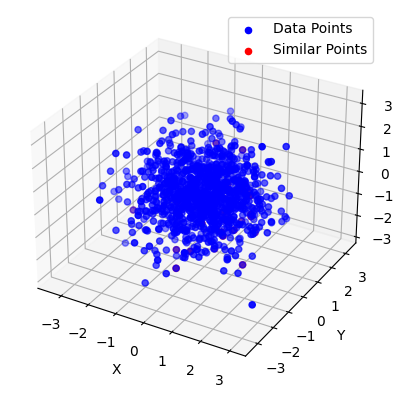

In [73]:
import matplotlib.pyplot as plt

def plot_data_points(dataset, similar_points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c='b', label='Data Points')
    ax.scatter(dataset[similar_points, 0], dataset[similar_points, 1], dataset[similar_points, 2], c='r', label='Similar Points')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.legend()
    plt.show()

plot_data_points(dataset, similar_points)


This code snippet will plot the data points in a 3D scatter plot, with the similar points highlighted in red.

That's it! This is an example of how to implement the LSH workflow using numpy in Python. Keep in mind that the example provided here is a simplified version, and there are many variations and optimizations that can be applied to LSH depending on the specific requirements of your application.

## Benefits of L2 Normalization for the LSH (Locality Sensitive Hashing)

L2 normalization of embedding vectors can help with the LSH (Locality Sensitive Hashing) algorithm workflow steps in the following ways:

**Normalization for Similarity Measures**: L2 normalization ensures that the length of the embedding vectors is standardized to 1. This normalization is important for similarity measures such as cosine similarity, which calculates the cosine of the angle between two vectors. By normalizing the vectors, the angle between them becomes the sole factor in determining similarity, and the vector length does not bias the similarity metric.

**Improved Distance Calculation**: L2 normalization simplifies the calculation of distances between vectors. In LSH, one common distance metric used is the Euclidean distance. When the vectors are L2 normalized, the Euclidean distance between two vectors can be calculated as the square root of 2 minus twice the dot product between the vectors. This simplification makes the distance calculation more efficient and less computationally expensive.

**Hashing Efficiency**: L2 normalization helps in the efficient construction of hash functions for LSH. The main idea behind LSH is to map similar vectors to the same or nearby hash buckets. By normalizing the vectors, the hash functions can focus on capturing the angular information between vectors rather than their magnitudes. This improves the effectiveness of the hash functions and increases the probability of mapping similar vectors to the same hash bucket.

In summary, L2 normalization of embedding vectors helps in standardizing the vector lengths, simplifying distance calculations, and improving the efficiency of hash functions in the LSH algorithm.

## Vector Representation

In real life AI applications, especially considering search applications over unstructured data, first we convert the unstructured data to vector of numeric values, and then index properly to later
search for input queries to find the closest matches.

There are several techniques to vectorize the data lets start with the simplest one which is count vectorization.

## Count Vectorization

Consider the text: `I love text representations because they make vector search possible and more efficient. How lucky I am :)`


In [22]:

docs = [
    "The car skidded to stop for the deer that stood frozen in the headlights of the car.",
    "The vehicle slid and came to a halt in response to the deer's immobility under the car's headlights.",
    "As the car lost traction, it slid across the road and eventually halted abruptly, its brakes screeching, due to the presence of a motionless deer standing in the direct path of its headlights.",
    "The car skidded and stopped for the frozen deer in its headlights.",
    "The car skidded to a standstill for the deer that remained motionless in the car's headlights.",
    "The car skidded and stopped to avoid the motionless deer illuminated by its headlights.",
    "Having finished his PhD at 16, the boy genius  contemplated the challenges the world faced, and intuited that science must be the solution.",
    "After completing his PhD at the age of 16, the exceptionally talented young prodigy reflected on the global challenges and recognized science as the answer.",
    "Having successfully obtained his PhD at the remarkably young age of 16, the boy genius engaged in deep contemplation of the complex issues faced by the world. His intuition led him to firmly believe that science held the key to addressing these challenges, further fueling his dedication to scientific pursuits.",
    "The boy genius finished his PhD at 16 and believed science was the solution to the world's challenges.",
    "Having completed his doctorate at 16, the exceptionally gifted young prodigy pondered the difficulties confronting the world, intuitively perceiving science as the remedy.",
    "The 16-year-old genius, having earned a PhD, contemplated global challenges and recognized science as the solution.",
    "The Frozen Deer was a popular store in the mountain town that sold supplies for hikers and mountain bikers.",
    "The scientific article explains what causes animals to freeze staring into the headlights of speeding vehicles causing many deaths and accidents every year.",
    "A record cold winter followed the drought. Many malnourished deer froze to death in the region.",
    "The ice cream shop sold the Frozen Dear, a treat that became an inseparable and endearing part of the town’s high school dating.",
    "The hunter proceeded to cut, clean, and freeze the deer. The hunter was lucky to get the deer, as his food supplies for the winter were running low.",
    "The driver's negligence resulted in a tragic car crash.",
    "Poor road conditions contributed to the accident.",
    "The collision caused significant damage to both vehicles.",
    "Speeding led to a fatal car accident on the highway.",
    "The driver's distraction caused a rear-end collision.",
    "The car skidded on the icy road, causing a collision with a tree.",
    "Drunk driving resulted in a serious car wreck.",
    "A sudden brake failure caused the car to crash into a building.",
    "The driver lost control of the vehicle, causing a rollover accident.",
    "Reckless overtaking led to a head-on collision.",
    "The invention of the telephone revolutionized communication.",
    "The discovery of penicillin transformed medicine.",
    "The invention of the light bulb revolutionized modern society.",
    "The invention of the computer paved the way for the digital age.",
    "The discovery of DNA's structure laid the foundation for genetic research.",
    "The invention of the internet connected the world like never before.",
    "The development of vaccines saved millions of lives.",
    "The invention of the automobile changed transportation forever.",
    "The discovery of X-rays revolutionized medical imaging.",
    "The invention of the printing press transformed the spread of knowledge.",
    "The deer gracefully leaped over the fence.",
    "The deer cautiously approached the forest clearing.",
    "The majestic deer stood still, observing its surroundings.",
    "The deer nibbled on the lush grass by the stream.",
    "The deer's antlers glistened in the sunlight.",
    "The startled deer quickly darted into the dense forest.",
    "The deer bounded effortlessly through the meadow.",
    "The doe gently nuzzled her fawn in a tender display of affection.",
    "The deer cautiously crossed the road, looking out for oncoming vehicles.",
    "The hunter patiently waited for a deer to appear within range.",
    "Climate change poses a grave threat to our planet.",
    "Poverty remains a persistent challenge in many regions.",
    "Access to clean water is a pressing global issue.",
    "Political instability continues to disrupt nations worldwide.",
    "The fight against inequality and social injustice persists.",
    "The threat of terrorism looms large in many countries.",
    "Cybersecurity breaches pose a significant challenge in the digital age.",
    "Food security remains a critical concern for many communities.",
    "The global pandemic has exposed vulnerabilities in healthcare systems.",
    "Finding sustainable energy solutions is crucial for a greener future.",
    ]